<a href="https://colab.research.google.com/github/savithrik199/DL-projects/blob/main/Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,LeakyReLU
from keras.optimizers import RMSprop
from keras.utils import np_utils
from sklearn.model_selection import train_test_split

In [ ]:
(x_tr,y_tr),(x_te,y_te)=mnist.load_data()

11493376/11490434 [==============================] - 0s 0us/step


In [ ]:
for i in [x_tr,y_tr,x_te,y_te]:
  print("dimension is {}".format(i.shape))

dimension is (60000, 28, 28)
dimension is (60000,)
dimension is (10000, 28, 28)
dimension is (10000,)


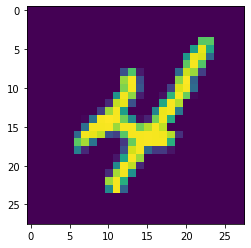

In [ ]:
plt.imshow(x_tr[9])
plt.show()

In [ ]:

x_tr=x_tr.reshape(x_tr.shape[0],x_tr.shape[1]*x_tr.shape[2])
x_te=x_te.reshape(x_te.shape[0],x_te.shape[1]*x_te.shape[2])

In [ ]:
x_tr.shape

(60000, 784)

In [ ]:
x_te.shape

(10000, 784)

In [ ]:
y_tr=np_utils.to_categorical(y_tr,10)
y_te=np_utils.to_categorical(y_te,10)

In [ ]:
y_tr

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [ ]:
y_te

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [ ]:
x_tr=x_tr/255
x_te=x_te/255

In [ ]:
x_tr

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
x_te

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
mod=Sequential()

In [ ]:
mod.add(Dense(2**15,activation="tanh",input_shape=(784,)))
mod.add(Dense(2**6,activation=LeakyReLU(alpha=0.3)))
mod.add(Dense(10,activation="softmax"))

In [ ]:
mod.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32768)             25722880  
_________________________________________________________________
dense_1 (Dense)              (None, 64)                2097216   
_________________________________________________________________
dense_2 (Dense)              (None, 10)                650       
Total params: 27,820,746
Trainable params: 27,820,746
Non-trainable params: 0
_________________________________________________________________


In [ ]:
mod.compile(loss="categorical_crossentropy",optimizer="rmsprop",metrics=["accuracy"])

In [ ]:
hist=mod.fit(x_tr,y_tr,batch_size=200,epochs=10)

Epoch 1/10
300/300 [==============================] - 8s 19ms/step - loss: 3.1237 - accuracy: 0.7170
Epoch 2/10
300/300 [==============================] - 6s 18ms/step - loss: 0.6094 - accuracy: 0.8836
Epoch 3/10
300/300 [==============================] - 5s 18ms/step - loss: 0.5079 - accuracy: 0.9086
Epoch 4/10
300/300 [==============================] - 6s 18ms/step - loss: 0.3606 - accuracy: 0.9281
Epoch 5/10
300/300 [==============================] - 6s 19ms/step - loss: 0.2860 - accuracy: 0.9428
Epoch 6/10
300/300 [==============================] - 6s 19ms/step - loss: 0.2482 - accuracy: 0.9489
Epoch 7/10
300/300 [==============================] - 6s 19ms/step - loss: 0.2134 - accuracy: 0.9559
Epoch 8/10
300/300 [==============================] - 6s 19ms/step - loss: 0.1852 - accuracy: 0.9607
Epoch 9/10
300/300 [==============================] - 6s 19ms/step - loss: 0.1495 - accuracy: 0.9671
Epoch 10/10
300/300 [==============================] - 6s 19ms/step - loss: 0.1426 - accura

In [ ]:
scr=mod.evaluate(x_te,y_te)

313/313 [==============================] - 1s 2ms/step - loss: 0.0295 - accuracy: 0.9912


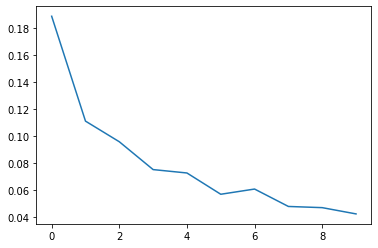

In [ ]:
plt.plot(hist.history["loss"])
plt.show()

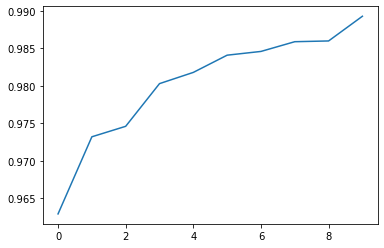

In [ ]:
plt.plot(hist.history["accuracy"])
plt.show()

In [ ]:
pred=mod.predict(x_te[:11])
print(np.argmax(pred,axis=1))

[7 2 1 0 4 1 4 9 5 9 0]


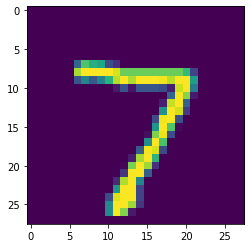

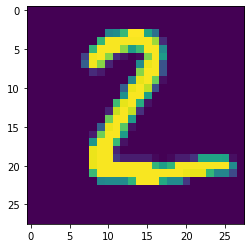

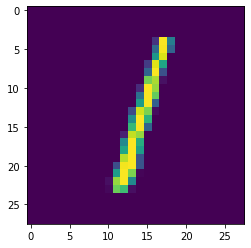

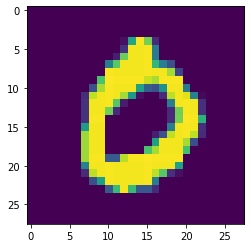

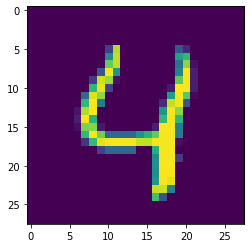

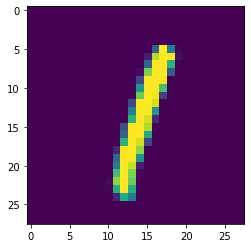

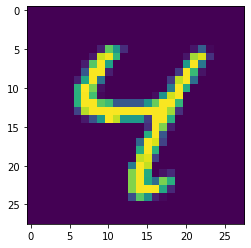

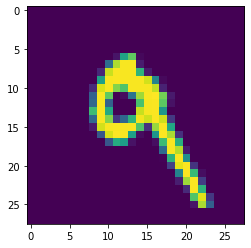

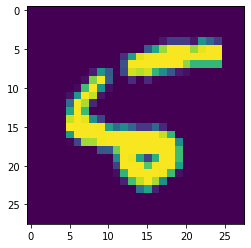

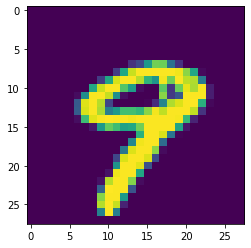

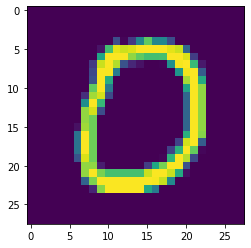

In [ ]:
for i in range(0,11):
  img=x_te[i]
  img=np.array(img,dtype="float")
  pixel=img.reshape((28,28))
  plt.imshow(pixel)
  plt.show()